___

<p style="text-align: center;"><img src="https://techproeducation.com/wp-content/uploads/2022/01/Calisma-Yuzeyi-1-kopya-5-1-768x126.png" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd      
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate, cross_val_score
#import warnings
#warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)

# Read Data

In [2]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [3]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [5]:
df.isna().sum().sum()

0

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.0,18024.380584,7381.679318,4950.0,12850.0,16900.0,21900.0,74600.0
km,15915.0,32089.995708,36977.214964,0.0,1920.5,20413.0,46900.0,317000.0
Gears,15915.0,5.937355,0.704772,5.0,5.0,6.0,6.0,8.0
age,15915.0,1.389695,1.121306,0.0,0.0,1.0,2.0,3.0
Previous_Owners,15915.0,1.042853,0.339178,0.0,1.0,1.0,1.0,4.0
hp_kW,15915.0,88.499340,26.674341,40.0,66.0,85.0,103.0,294.0
Inspection_new,15915.0,0.247063,0.431317,0.0,0.0,0.0,0.0,1.0
Displacement_cc,15915.0,1428.661891,275.804272,890.0,1229.0,1461.0,1598.0,2967.0
Weight_kg,15915.0,1337.700534,199.682385,840.0,1165.0,1295.0,1472.0,2471.0
cons_comb,15915.0,4.832124,0.867530,3.0,4.1,4.8,5.4,9.1


In [7]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

### Dataya Dönmek Gerekirse

In [8]:
df_copy = df.copy()

## Feature Engineering

In [9]:
df.select_dtypes(include ="object").head()

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


## Dummies control?

In [10]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

make_model          : 9
body_type           : 8
vat                 : 2
Type                : 5
Fuel                : 4
Comfort_Convenience : 6196
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4442
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


In [11]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

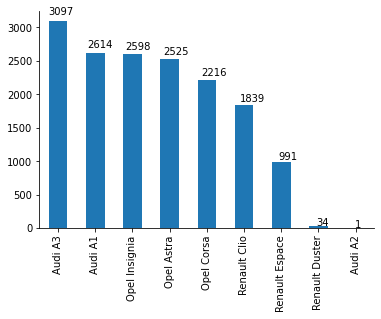

In [12]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))

In [13]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.0,Employee's car,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.0,1.0,85.0,0,Metallic,Cloth,Manual,1598.0,1135.0,front,4.9


In [14]:
df.drop(index=[2614], inplace =True)

In [15]:
df.shape

(15914, 23)

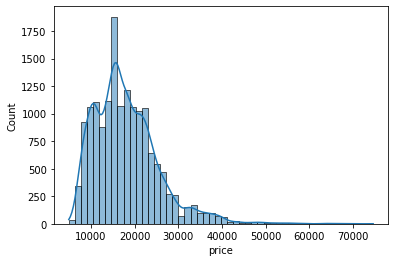

In [16]:
sns.histplot(df.price, bins=50, kde=True);

### skewness

In [17]:
skew(df.price)

1.236330745564795

In [18]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
0,15770,56013.000000,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8
1,14500,80000.000000,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6
2,14640,83450.000000,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8
3,14500,73000.000000,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8
4,16790,16200.000000,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1
...,...,...,...,...,...,...,...,...,...,...
15910,39950,1647.362609,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3
15911,39885,9900.000000,7.0,0.0,1.0,165.0,0,1798.0,1708.0,7.4
15912,39875,15.000000,6.0,0.0,1.0,146.0,1,1997.0,1734.0,5.3
15913,39700,10.000000,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3


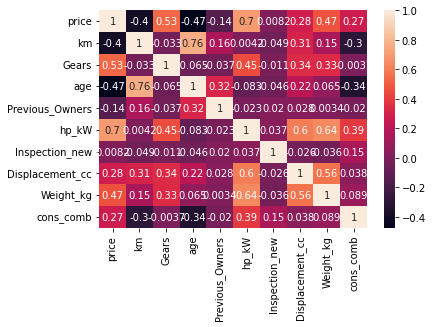

In [19]:
sns.heatmap(df_numeric.corr(), annot =True);

## multicollinearity control

In [20]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [21]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

False

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


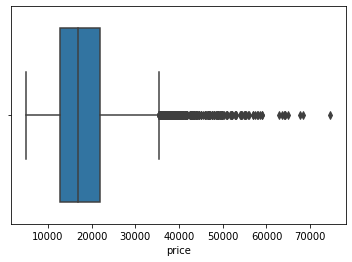

In [22]:
sns.boxplot(df.price);

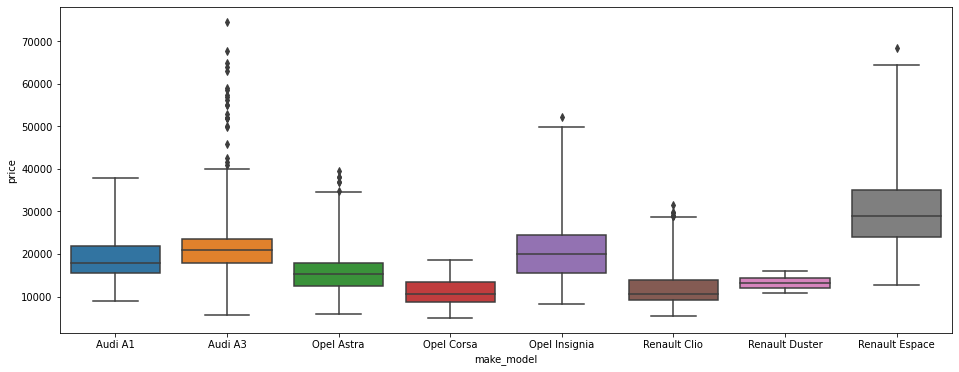

In [23]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

## Get dummies 

In [24]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [25]:
df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_")

,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield
0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0
15911,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
15912,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0
15913,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [26]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))
df.shape

(15914, 117)

In [27]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [28]:
df = pd.get_dummies(df, drop_first =True)

In [29]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.0,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1

In [30]:
df.shape

(15914, 133)

In [31]:
df.isnull().any().any()

False

In [32]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

age                                        -0.473478
Gearing_Type_Manual                        -0.431798
km                                         -0.399301
make_model_Opel Corsa                      -0.379363
Type_Used                                  -0.366300
make_model_Renault Clio                    -0.297910
Drive_chain_front                          -0.155738
Previous_Owners                            -0.144625
make_model_Opel Astra                      -0.128429
em_CD player                               -0.092823
em_On-board computer                       -0.077462
ss_Central door lock with remote control   -0.070339
ss_Fog lights                              -0.053086
Paint_Type_Perl effect                     -0.049887
ss_Isofix                                  -0.045762
body_type_Sedans                           -0.044251
ss_Central door lock                       -0.043515
ss_Power steering                          -0.041182
Paint_Type_Uni/basic                       -0.

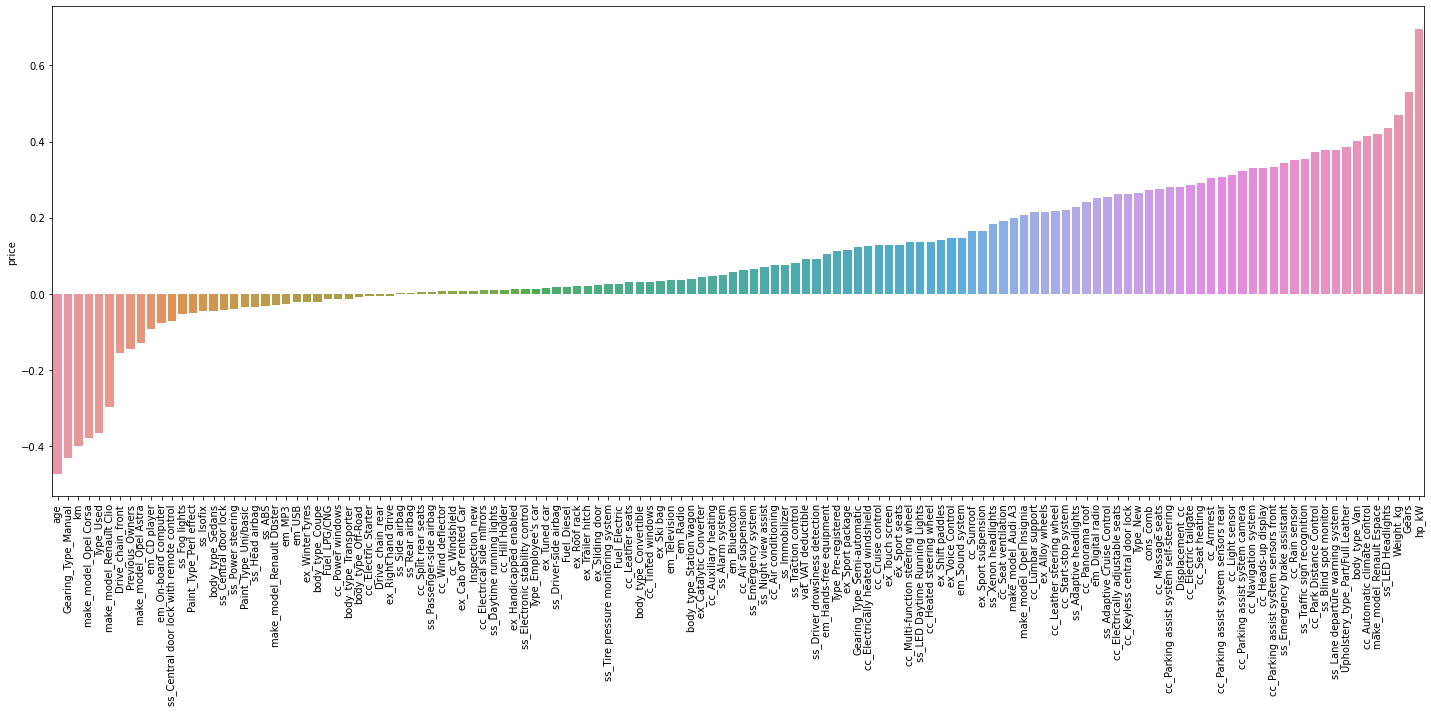

In [33]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

### random_state=101

### test size = 0.2

In [34]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.0,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1

In [35]:
X = df.drop("price" , axis = 1)
y = df["price"]

In [36]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=101 ) # So important.

In [37]:
# Done

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()

In [40]:
lm.fit(X_train , y_train)

LinearRegression()

In [41]:
lm_y_pred = lm.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [43]:
mae = mean_absolute_error(y_test , lm_y_pred)
mse = mean_squared_error(y_test , lm_y_pred)
rmse = mean_squared_error(y_test , lm_y_pred) ** 0.5
r2 = r2_score(y_test , lm_y_pred)

In [44]:
print(f""" 
      Mean Absolute Error : {mae}
      Root Mean Squared Error : {rmse}
      Mean Squared Error : {mse}
      R2 Score : {r2}
      """)

 
      Mean Absolute Error : 1705.2166693090949
      Root Mean Squared Error : 2405.2340241840584
      Mean Squared Error : 5785150.711092641
      R2 Score : 0.8904937070940316
      


In [45]:
lm.coef_

array([-3.56115183e-02,  5.85094442e+02, -1.60432525e+03,  1.28422274e+02,
        9.23925598e+01, -1.79331625e+02, -8.00401728e-01, -1.19140852e+00,
        1.20671145e+02,  2.86407919e+02,  1.19343902e+02,  4.91674245e+01,
        2.39425843e+02, -2.43354239e+02,  2.89560335e+02, -9.93635697e+02,
       -1.31214639e+02,  7.62716901e+01,  1.81840290e+02,  5.01192779e+02,
        2.33356973e+03,  3.20815106e+02,  8.24073299e+01,  7.23449823e+01,
       -7.81526036e+02,  1.49184681e+02,  1.88373673e+02, -3.80530019e+02,
        4.54336284e+02,  6.89122428e+01,  3.05244084e+02, -3.39200280e+02,
        5.37581048e+02,  7.02810814e+01,  9.07510355e+02,  2.62453353e+02,
       -4.02181546e+02,  1.09236810e+02, -2.83853862e+02,  3.84790821e+01,
        8.53777134e+02, -3.15430506e+02, -3.74640551e+01,  8.12983897e+02,
        3.53385002e+01, -4.58081514e+02, -4.48811275e+02, -5.52705554e+02,
        3.13142474e+01,  8.26141360e+02,  5.29152455e+01,  3.12745351e+01,
       -2.89922198e+00,  

## Adjusted R2 Score

![](2022-09-19-22-55-25.png)

In [46]:
n = X_train.shape[0]
n

12731

In [47]:
p = X_train.shape[1]
p

132

In [48]:
adj_r2 = 1 - (1 - r2)*(n-1) / (n-p-1)
adj_r2


0.8893463161856662

## Cross Validate

In [49]:
from sklearn.model_selection import cross_val_score , cross_validate

In [50]:
cross_validate(lm , X_train , y_train , cv = 10)

{'fit_time': array([0.12267137, 0.19260025, 0.16455889, 0.09973335, 0.10745764,
        0.11166549, 0.10740972, 0.19846869, 0.10078812, 0.11420131]),
 'score_time': array([0.00307322, 0.00299096, 0.0029912 , 0.00299311, 0.00199366,
        0.00199509, 0.00299239, 0.00199461, 0.00299168, 0.00299215]),
 'test_score': array([0.88752729, 0.88371388, 0.88929339, 0.88302457, 0.88968077,
        0.8855113 , 0.88595306, 0.90096554, 0.87418662, 0.88133816])}

In [51]:
cross_val_df = pd.DataFrame(cross_validate(lm , X_train , y_train , cv = 10))
cross_val_df

,fit_time,score_time,test_score
0,0.126680,0.002995,0.887527
1,0.118197,0.002991,0.883714
2,0.122670,0.002993,0.889293
3,0.095360,0.003926,0.883025
4,0.098294,0.002735,0.889681
5,0.120645,0.002992,0.885511
6,0.106537,0.002992,0.885953
7,0.102444,0.001994,0.900966
8,0.150561,0.002007,0.874187
9,0.130650,0.003990,0.881338


In [52]:
cv_r2_score = cross_val_df["test_score"].mean()
cv_r2_score

0.8861194586578917

In [53]:
# cross_val_score(lm , X_train , y_train , cv = 10) 

## Prediction Error

In [54]:
y_test

15079    25490
13097    15928
11349    21890
2668     18450
12668    29990
         ...  
10336    10990
12699    25862
7491     14770
4945     20400
7999     17290
Name: price, Length: 3183, dtype: int64

In [55]:
lm_y_pred

array([27780.62783114, 17745.95998029, 23181.94711933, ...,
       14680.67610163, 20912.67151224, 20408.10744927])

In [56]:
error_df = pd.DataFrame({
    "Real Values" : y_test ,
    "Predict Values" : lm_y_pred ,
    "Pred Error Values" : lm_y_pred - y_test
})

error_df

,Real Values,Predict Values,Pred Error Values
15079,25490,27780.627831,2290.627831
13097,15928,17745.959980,1817.959980
11349,21890,23181.947119,1291.947119
2668,18450,18838.629659,388.629659
12668,29990,28617.017272,-1372.982728
...,...,...,...
10336,10990,12175.913445,1185.913445
12699,25862,28102.866662,2240.866662
7491,14770,14680.676102,-89.323898
4945,20400,20912.671512,512.671512


In [57]:
from yellowbrick.regressor import PredictionError

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


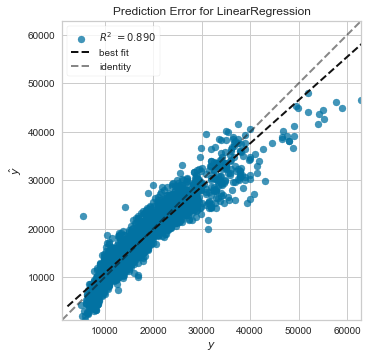

In [58]:
visualizer = PredictionError(lm)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

## Residual Plot

![](2022-09-19-23-23-14.png)

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


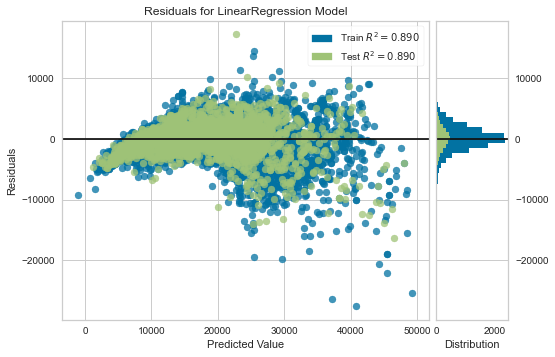

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [59]:
# Instantiate the linear model and visualizer
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [60]:
error_df["Pred Error Values"]

15079    2290.627831
13097    1817.959980
11349    1291.947119
2668      388.629659
12668   -1372.982728
            ...     
10336    1185.913445
12699    2240.866662
7491      -89.323898
4945      512.671512
7999     3118.107449
Name: Pred Error Values, Length: 3183, dtype: float64

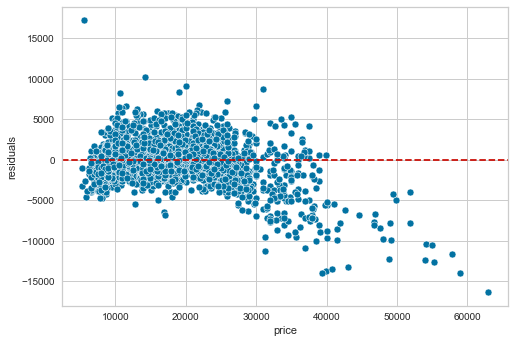

In [61]:
sns.scatterplot(x = y_test , y = error_df["Pred Error Values"]) # x Ekseninde gerçek price değerleri. y ekseninde ise hatalı tahmin değerlerimiz.

plt.axhline( y = 0 , color = "r" , linestyle = "--") 
plt.ylabel("residuals")
plt.show()

In [62]:
# sns.scatterplot(x = y_test, y = -residuals) #-residuals
# plt.axhline(y = 0, color ="r", linestyle = "--")
# plt.ylabel("residuals")
# plt.show()


## Dropping observations from the dataset that worsen my predictions

### test size = 0.2

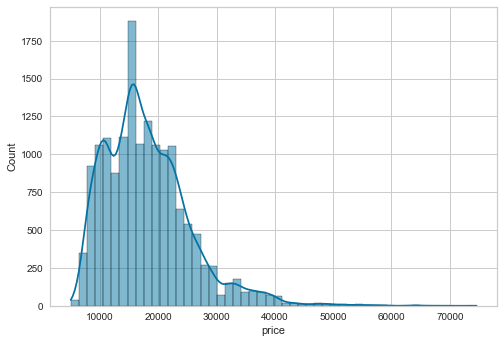

In [63]:
sns.histplot(df.price, bins=50, kde=True);

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


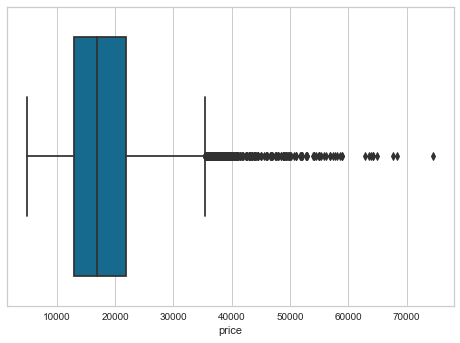

In [64]:
sns.boxplot(df.price);

In [65]:
df[df.price > 35000].head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
713,37900,7000.0,6.0,0.0,1.0,147.0,0,1984.0,1240.0,6.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
732,35900,200.0,7.0,0.0,1.0,85.0,0,999.0,1230.0,4.8,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,1,1,1,1,0,1,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0
3587,64900,35000.0,7.0,1.0,1.0,294.0,0,2480.0,1585.0,8.3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0
3589,39959,7.0,7.0,1.0,1.0,85.0,0,999.0,1155.0,4.5,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0
3590,62900,700.0,7.0,0.0,1.0,294.0,0,2480.0,1585.0,8.3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0

In [66]:
# df.drop(df[df.price > 35000].index , axis = 0 , inplace=True) # We dropped 500 outlier observations.

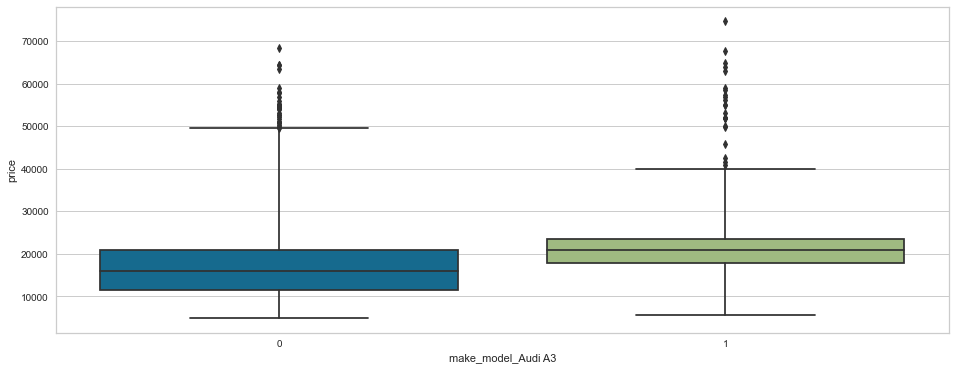

In [67]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model_Audi A3", y="price", data=df, whis=3)
plt.show()

In [68]:
df[((df["price"] > 40000) & (df["make_model_Audi A3"]))].index 

Int64Index([3587, 3590, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600,
            3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3648,
            3649],
           dtype='int64')

In [69]:
df[((df["price"] > 40000) & (df["make_model_Audi A3"]))].index

Int64Index([3587, 3590, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600,
            3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3648,
            3649],
           dtype='int64')

In [70]:
df.drop(df[((df["price"] > 40000) & (df["make_model_Audi A3"]))].index , axis = 0 , inplace=True)

In [71]:
df.shape

(15891, 133)

In [72]:
# X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=101 )

In [73]:
# lm_y_train_pred = pred = lm.predict(X_train)

In [74]:
# lm_train_mae = mean_absolute_error(y_train , lm_y_train_pred)
# lm_train_mse = mean_squared_error(y_train , lm_y_train_pred)
# lm_train_rmse = mean_squared_error(y_train , lm_y_train_pred) ** 0.5
# lm_train_r2 = r2_score(y_train , lm_y_train_pred)

In [75]:
# lm_test_mae = mean_absolute_error(y_test , lm_y_pred)
# lm_test_mse = mean_squared_error(y_test , lm_y_pred)
# lm_test_rmse = mean_squared_error(y_test , lm_y_pred) ** 0.5
# lm_test_r2 = r2_score(y_test , lm_y_pred)

In [76]:
# lm_scores = pd.DataFrame({
#     'Train' : [lm_train_r2,lm_train_mae,lm_train_mse,lm_train_rmse],
#     'Test' : [lm_test_r2 , lm_test_mae, lm_test_mse , lm_test_rmse]
# })
# lm_scores

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [77]:
from sklearn.linear_model import Ridge , RidgeCV

In [78]:
# rdg = Ridge(alpha=1 , normalize = True) # If we use normalize = True, then we don't need scale to data anymore. This will be deprecated.

In [79]:
#rdg = Ridge()

In [80]:
#alphas = np.linspace(15,20,500)

In [81]:
#rdg = RidgeCV(alphas = alphas , cv = 10 )

## Scaling

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

In [84]:
X_train_scaled = scaler.fit_transform(X_train)

In [85]:
X_test_scaled = scaler.transform(X_test)

## Ridge

## Random state=42

In [86]:
rdg = Ridge(random_state = 42)

In [87]:
rdg.fit(X_train_scaled , y_train)

Ridge(random_state=42)

In [88]:
rdg_y_train_pred = rdg.predict(X_train_scaled)
rdg_y_test_pred = rdg.predict(X_test_scaled)

In [89]:
rdg_train_mae = mean_absolute_error(y_train , rdg_y_train_pred)
rdg_train_mse = mean_squared_error(y_train , rdg_y_train_pred)
rdg_train_rmse = mean_squared_error(y_train , rdg_y_train_pred) ** 0.5
rdg_train_r2 = r2_score(y_train , rdg_y_train_pred)

In [90]:
rdg_test_mae = mean_absolute_error(y_test , rdg_y_test_pred)
rdg_test_mse = mean_squared_error(y_test , rdg_y_test_pred)
rdg_test_rmse = mean_squared_error(y_test , rdg_y_test_pred) ** 0.5
rdg_test_r2 = r2_score(y_test , rdg_y_test_pred)

In [91]:
ridge_scores_1 = pd.DataFrame({
    'Ridge_Train_1' : [rdg_train_r2,rdg_train_mae,rdg_train_mse,rdg_train_rmse],
    'Ridge_Test_1' : [rdg_test_r2 , rdg_test_mae, rdg_test_mse , rdg_test_rmse]
} , index = ['R2 Score' , 'Mean Absolute Error' , 'Mean Squarred Error' , 'Root Mean Squarred Error'])
ridge_scores_1

,Ridge_Train_1,Ridge_Test_1
R2 Score,8.899971e-01,8.904950e-01
Mean Absolute Error,1.705418e+03,1.705173e+03
Mean Squarred Error,6.038123e+06,5.785080e+06
Root Mean Squarred Error,2.457259e+03,2.405219e+03


## Finding best alpha for Ridge

In [92]:
alphas = np.linspace(5,12,700)

In [93]:
rdg_cv = RidgeCV(alphas = alphas)

In [94]:
rdg_cv.fit(X_train_scaled , y_train)

RidgeCV(alphas=array([ 5.        ,  5.01001431,  5.02002861,  5.03004292,  5.04005722,
        5.05007153,  5.06008584,  5.07010014,  5.08011445,  5.09012876,
        5.10014306,  5.11015737,  5.12017167,  5.13018598,  5.14020029,
        5.15021459,  5.1602289 ,  5.1702432 ,  5.18025751,  5.19027182,
        5.20028612,  5.21030043,  5.22031474,  5.23032904,  5.24034335,
        5.25035765,  5.26037196,  5.27038627,  5.28040057,  5.29041488,
        5.300429...
       11.70958512, 11.71959943, 11.72961373, 11.73962804, 11.74964235,
       11.75965665, 11.76967096, 11.77968526, 11.78969957, 11.79971388,
       11.80972818, 11.81974249, 11.8297568 , 11.8397711 , 11.84978541,
       11.85979971, 11.86981402, 11.87982833, 11.88984263, 11.89985694,
       11.90987124, 11.91988555, 11.92989986, 11.93991416, 11.94992847,
       11.95994278, 11.96995708, 11.97997139, 11.98998569, 12.        ]))

In [95]:
rdg_cv.alpha_ # Ridge want to 11.188 alpha

11.188841201716738

In [96]:
rdg_cv_y_train_pred = rdg_cv.predict(X_train_scaled)

In [97]:
rdg_cv_y_test_pred = rdg_cv.predict(X_test_scaled)

In [98]:
rdg_cv_train_mae = mean_absolute_error(y_train , rdg_cv_y_train_pred)
rdg_cv_train_mse = mean_squared_error(y_train , rdg_cv_y_train_pred)
rdg_cv_train_rmse = mean_squared_error(y_train , rdg_cv_y_train_pred) ** 0.5
rdg_cv_train_r2 = r2_score(y_train , rdg_cv_y_train_pred)

In [99]:
rdg_cv_test_mae = mean_absolute_error(y_test , rdg_cv_y_test_pred)
rdg_cv_test_mse = mean_squared_error(y_test , rdg_cv_y_test_pred)
rdg_cv_test_rmse = mean_squared_error(y_test , rdg_cv_y_test_pred) ** 0.5
rdg_cv_test_r2 = r2_score(y_test , rdg_cv_y_test_pred)

In [100]:
ridge_scores_cv = pd.DataFrame({
    'Ridge_Train_11.18' : [rdg_cv_train_r2,rdg_cv_train_mae,rdg_cv_train_mse,rdg_cv_train_rmse],
    'Ridge_Test_11.18' : [rdg_cv_test_r2 , rdg_cv_test_mae, rdg_cv_test_mse , rdg_cv_test_rmse]
} , index = ['R2 Score' , 'Mean Absolute Error' , 'Mean Squarred Error' , 'Root Mean Squarred Error'])
ridge_scores_cv

,Ridge_Train_11.18,Ridge_Test_11.18
R2 Score,8.899953e-01,8.905066e-01
Mean Absolute Error,1.705087e+03,1.704745e+03
Mean Squarred Error,6.038225e+06,5.784467e+06
Root Mean Squarred Error,2.457280e+03,2.405092e+03


In [101]:
scores = pd.concat([ridge_scores_1, ridge_scores_cv] , axis = 1)
scores

,Ridge_Train_1,Ridge_Test_1,Ridge_Train_11.18,Ridge_Test_11.18
R2 Score,8.899971e-01,8.904950e-01,8.899953e-01,8.905066e-01
Mean Absolute Error,1.705418e+03,1.705173e+03,1.705087e+03,1.704745e+03
Mean Squarred Error,6.038123e+06,5.785080e+06,6.038225e+06,5.784467e+06
Root Mean Squarred Error,2.457259e+03,2.405219e+03,2.457280e+03,2.405092e+03


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## random state=42

In [102]:
from sklearn.linear_model import Lasso , LassoCV

In [103]:
lss = Lasso(random_state = 42).fit(X_train_scaled,y_train)

In [104]:
lss_y_train_pred = lss.predict(X_train_scaled)

In [105]:
lss_y_test_pred = lss.predict(X_test_scaled)

In [106]:
lss_test_mae = mean_absolute_error(y_test , lss_y_test_pred)
lss_test_mse = mean_squared_error(y_test , lss_y_test_pred)
lss_test_rmse = mean_squared_error(y_test , lss_y_test_pred) ** 0.5
lss_test_r2 = r2_score(y_test , lss_y_test_pred)

In [107]:
lss_train_mae = mean_absolute_error(y_train , lss_y_train_pred)
lss_train_mse = mean_squared_error(y_train , lss_y_train_pred)
lss_train_rmse = mean_squared_error(y_train , lss_y_train_pred) ** 0.5
lss_train_r2 = r2_score(y_train , lss_y_train_pred)

In [108]:
lasso_scores_1 = pd.DataFrame({
    'Lasso_Train_1' : [lss_train_r2,lss_train_mae,lss_train_mse,lss_train_rmse],
    'Lasso_Test_1' : [lss_test_r2 , lss_test_mae, lss_test_mse , lss_test_rmse]
} , index = ['R2 Score' , 'Mean Absolute Error' , 'Mean Squarred Error' , 'Root Mean Squarred Error'])
lasso_scores_1

,Lasso_Train_1,Lasso_Test_1
R2 Score,8.899915e-01,8.905348e-01
Mean Absolute Error,1.704992e+03,1.704430e+03
Mean Squarred Error,6.038432e+06,5.782982e+06
Root Mean Squarred Error,2.457322e+03,2.404783e+03


In [109]:
scores = scores.join(lasso_scores_1)
scores

,Ridge_Train_1,Ridge_Test_1,Ridge_Train_11.18,Ridge_Test_11.18,Lasso_Train_1,Lasso_Test_1
R2 Score,8.899971e-01,8.904950e-01,8.899953e-01,8.905066e-01,8.899915e-01,8.905348e-01
Mean Absolute Error,1.705418e+03,1.705173e+03,1.705087e+03,1.704745e+03,1.704992e+03,1.704430e+03
Mean Squarred Error,6.038123e+06,5.785080e+06,6.038225e+06,5.784467e+06,6.038432e+06,5.782982e+06
Root Mean Squarred Error,2.457259e+03,2.405219e+03,2.457280e+03,2.405092e+03,2.457322e+03,2.404783e+03


## Finding best alpha for Lasso

In [110]:
alphas_space = np.linspace(4,6,200)

In [111]:
lss_cv = LassoCV(alphas = alphas_space , cv = 10)

In [112]:
lss_cv.fit(X_train_scaled,y_train)

LassoCV(alphas=array([4.        , 4.01005025, 4.0201005 , 4.03015075, 4.04020101,
       4.05025126, 4.06030151, 4.07035176, 4.08040201, 4.09045226,
       4.10050251, 4.11055276, 4.12060302, 4.13065327, 4.14070352,
       4.15075377, 4.16080402, 4.17085427, 4.18090452, 4.19095477,
       4.20100503, 4.21105528, 4.22110553, 4.23115578, 4.24120603,
       4.25125628, 4.26130653, 4.27135678, 4.28140704, 4.29145729,
       4.30150...
       5.65829146, 5.66834171, 5.67839196, 5.68844221, 5.69849246,
       5.70854271, 5.71859296, 5.72864322, 5.73869347, 5.74874372,
       5.75879397, 5.76884422, 5.77889447, 5.78894472, 5.79899497,
       5.80904523, 5.81909548, 5.82914573, 5.83919598, 5.84924623,
       5.85929648, 5.86934673, 5.87939698, 5.88944724, 5.89949749,
       5.90954774, 5.91959799, 5.92964824, 5.93969849, 5.94974874,
       5.95979899, 5.96984925, 5.9798995 , 5.98994975, 6.        ]),
        cv=10)

In [113]:
lss_cv.alpha_

4.542713567839196

In [114]:
lss_cv_y_train_pred = lss_cv.predict(X_train_scaled)

In [115]:
lss_cv_y_test_pred = lss_cv.predict(X_test_scaled)

In [116]:
lss_cv_train_mae = mean_absolute_error(y_train , lss_cv_y_train_pred)
lss_cv_train_mse = mean_squared_error(y_train , lss_cv_y_train_pred)
lss_cv_train_rmse = mean_squared_error(y_train , lss_cv_y_train_pred) ** 0.5
lss_cv_train_r2 = r2_score(y_train , lss_cv_y_train_pred)

In [117]:
lss_cv_test_mae = mean_absolute_error(y_test , lss_cv_y_test_pred)
lss_cv_test_mse = mean_squared_error(y_test , lss_cv_y_test_pred)
lss_cv_test_rmse = mean_squared_error(y_test , lss_cv_y_test_pred) ** 0.5
lss_cv_test_r2 = r2_score(y_test , lss_cv_y_test_pred)

In [118]:
lasso_scores_5 = pd.DataFrame({
    'Lasso_CV_Train_5' : [lss_cv_train_r2,lss_cv_train_mae,lss_cv_train_mse,lss_cv_train_rmse],
    'Lasso_CV_Test_5' : [lss_cv_test_r2 , lss_cv_test_mae, lss_cv_test_mse , lss_cv_test_rmse]
} , index = ['R2 Score' , 'Mean Absolute Error' , 'Mean Squarred Error' , 'Root Mean Squarred Error'])
lasso_scores_5

,Lasso_CV_Train_5,Lasso_CV_Test_5
R2 Score,8.898835e-01,8.906183e-01
Mean Absolute Error,1.704167e+03,1.701901e+03
Mean Squarred Error,6.044360e+06,5.778567e+06
Root Mean Squarred Error,2.458528e+03,2.403865e+03


In [119]:
scores = scores.join(lasso_scores_5)
scores

,Ridge_Train_1,Ridge_Test_1,Ridge_Train_11.18,Ridge_Test_11.18,Lasso_Train_1,Lasso_Test_1,Lasso_CV_Train_5,Lasso_CV_Test_5
R2 Score,8.899971e-01,8.904950e-01,8.899953e-01,8.905066e-01,8.899915e-01,8.905348e-01,8.898835e-01,8.906183e-01
Mean Absolute Error,1.705418e+03,1.705173e+03,1.705087e+03,1.704745e+03,1.704992e+03,1.704430e+03,1.704167e+03,1.701901e+03
Mean Squarred Error,6.038123e+06,5.785080e+06,6.038225e+06,5.784467e+06,6.038432e+06,5.782982e+06,6.044360e+06,5.778567e+06
Root Mean Squarred Error,2.457259e+03,2.405219e+03,2.457280e+03,2.405092e+03,2.457322e+03,2.404783e+03,2.458528e+03,2.403865e+03


In [120]:
lss.coef_

array([-1314.74578779,   410.76410482, -1797.99734254,    42.02111916,
        2457.53700869,   -76.20555141,  -207.7818164 ,  -231.29472156,
          96.30436909,    63.14921565,     6.14364525,    23.90162227,
         119.00158785,   -29.96987992,   125.72445735,    -7.96552172,
         -31.07099751,    30.33205273,    60.44802994,   117.60609381,
         452.25658949,   126.80631156,    38.85234656,    26.09758024,
         -41.62356126,    71.9600668 ,    90.29371363,  -154.82247341,
          68.51035901,    27.43419935,   151.10629156,   -62.80665255,
         248.5187075 ,    27.46206435,   196.39293879,   125.23962893,
        -184.93694162,    27.25290463,  -135.00212225,    19.96887892,
         193.40590343,  -108.97398778,   -16.40547346,   120.45390503,
           8.09537081,   -21.66223464,   -10.35084417,  -221.0255473 ,
          13.44278843,   286.64987729,    21.46875786,    14.01419167,
          -0.        ,    93.36658634,   -89.20174766,   -57.27069584,
      

In [121]:
lss_cv.coef_

array([-1.30945821e+03,  4.10955919e+02, -1.80548668e+03,  3.64304564e+01,
        2.42913385e+03, -7.26145218e+01, -1.61491313e+02, -2.08281111e+02,
        6.64229714e+01,  5.93374251e+01,  5.06231895e-02,  2.18678478e+01,
        1.22297780e+02, -2.42697097e+01,  1.16302971e+02, -4.97772375e+00,
       -1.99699592e+01,  2.67972223e+01,  5.61461590e+01,  1.15075091e+02,
        4.51920500e+02,  1.19117747e+02,  3.12727118e+01,  2.06407771e+01,
       -3.79296588e+01,  6.98654777e+01,  7.67898683e+01, -1.46032435e+02,
        6.71516063e+01,  1.82708944e+01,  1.47286013e+02, -5.26730133e+01,
        2.33093093e+02,  1.93612430e+01,  1.95264429e+02,  1.16372136e+02,
       -1.54817243e+02,  2.11710209e+01, -1.15755208e+02,  2.20460839e+01,
        1.94454271e+02, -9.48814037e+01, -9.36425344e+00,  1.13811295e+02,
        7.73684233e-01, -1.57524504e+01, -7.19169040e+00, -2.14951707e+02,
        1.02800171e+01,  2.84427269e+02,  8.69780594e+00,  9.96733642e+00,
       -0.00000000e+00,  

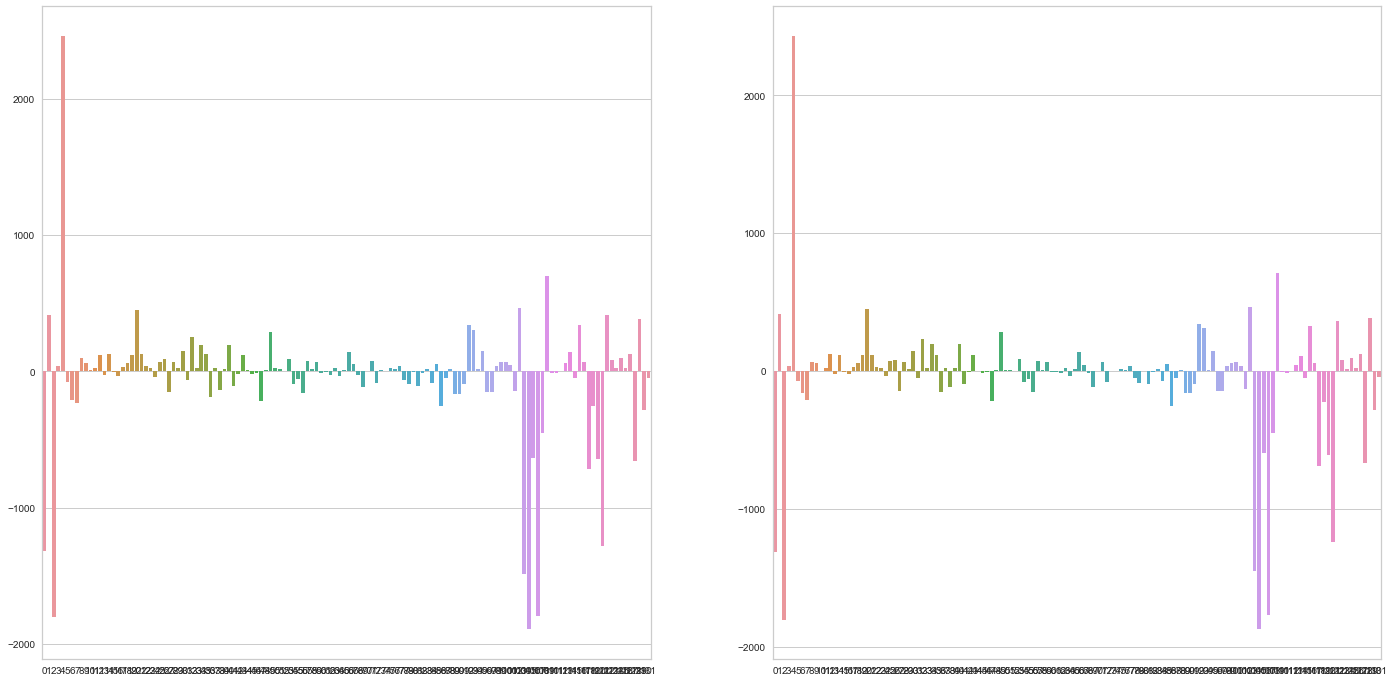

In [122]:
fig, ax = plt.subplots(1,2 , figsize = (24,12))

sns.barplot(x = list(range(len(lss.coef_))) , y = lss.coef_ , ax = ax[0]);
sns.barplot(x = list(range(len(lss_cv.coef_))) , y = lss_cv.coef_ , ax = ax[1]);

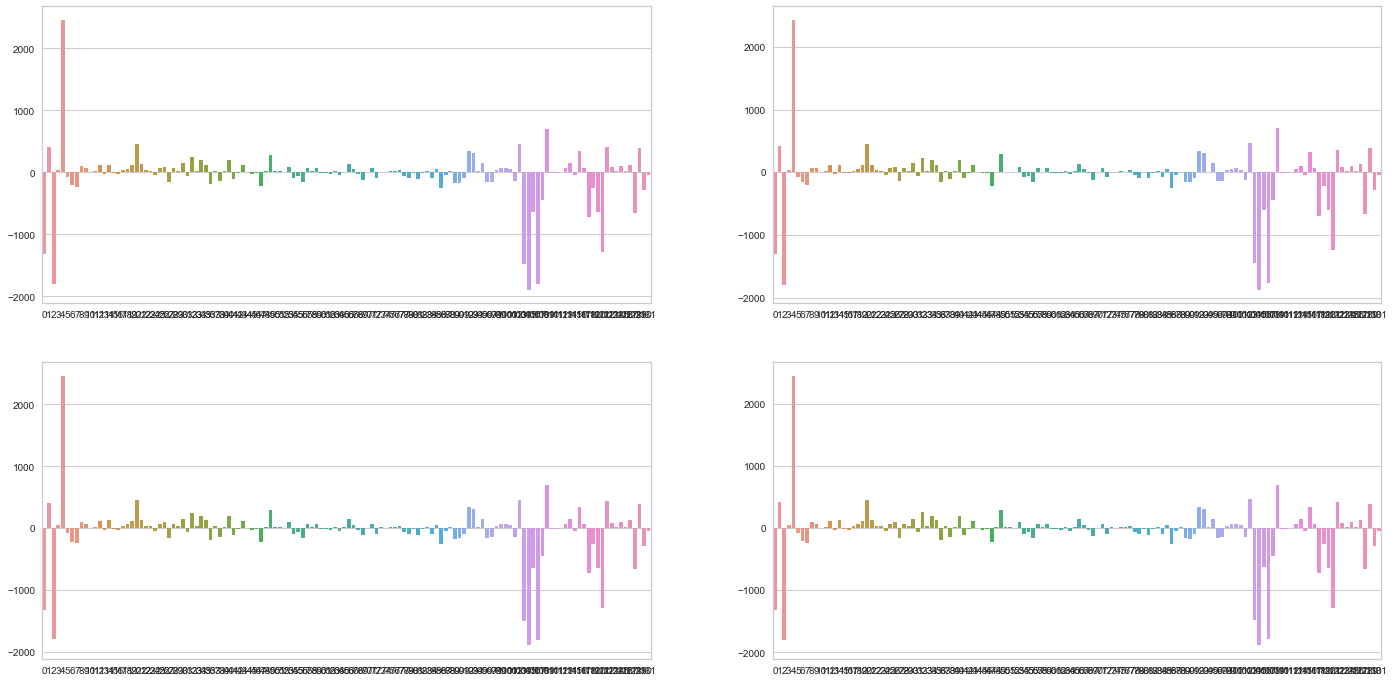

In [123]:
fig, ax = plt.subplots(2,2 , figsize = (24,12))

sns.barplot(x = list(range(len(lss.coef_))) , y = lss.coef_ , ax = ax[0][0]);
sns.barplot(x = list(range(len(lss_cv.coef_))) , y = lss_cv.coef_ , ax = ax[0][1]);
sns.barplot(x = list(range(len(rdg.coef_))) , y = rdg.coef_ , ax = ax[1][0]);
sns.barplot(x = list(range(len(rdg_cv.coef_))) , y = rdg_cv.coef_ , ax = ax[1][1]);

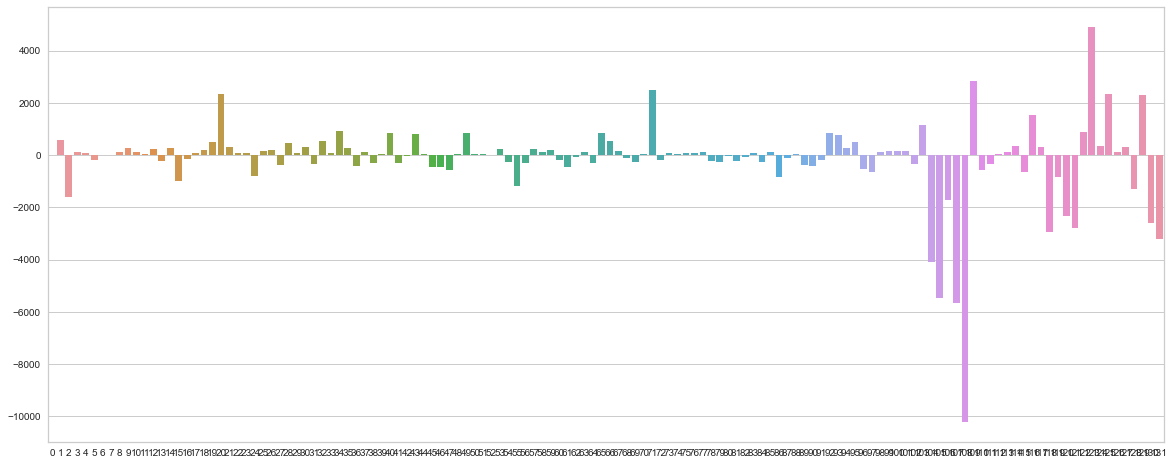

In [124]:
plt.figure(figsize=(20,8))

sns.barplot(x = list(range(len(lm.coef_))) , y = lm.coef_);

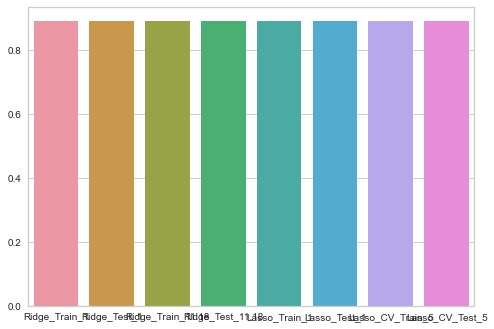

In [125]:
sns.barplot(x= scores.columns , y = scores.iloc[0,:].values);

In [126]:
# scores

In [127]:
# scores.columns

In [128]:
# scores.iloc[0,:].values

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## random state = 42

In [129]:
from sklearn.linear_model import ElasticNet , ElasticNetCV

In [130]:
els = ElasticNet(random_state=42)

In [131]:
els.fit(X_train_scaled , y_train)

ElasticNet(random_state=42)

In [132]:
els_y_train_pred = els.predict(X_train_scaled)

In [133]:
els_y_test_pred = els.predict(X_test_scaled)

In [134]:
els_train_mae = mean_absolute_error(y_train , els_y_train_pred)
els_train_mse = mean_squared_error(y_train , els_y_train_pred)
els_train_rmse = mean_squared_error(y_train , els_y_train_pred) ** 0.5
els_train_r2 = r2_score(y_train , els_y_train_pred)

In [135]:
els_test_mae = mean_absolute_error(y_test , els_y_test_pred)
els_test_mse = mean_squared_error(y_test , els_y_test_pred)
els_test_rmse = mean_squared_error(y_test , els_y_test_pred) ** 0.5
els_test_r2 = r2_score(y_test , els_y_test_pred)

In [136]:
els_scores_1 = pd.DataFrame({
    'ElasticNet_Train_1' : [els_train_r2,els_train_mae,els_train_mse,els_train_rmse],
    'ElasticNet_Test_1' : [els_test_r2 , els_test_mae, els_test_mse , els_test_rmse]
} , index = ['R2 Score' , 'Mean Absolute Error' , 'Mean Squarred Error' , 'Root Mean Squarred Error'])
els_scores_1

,ElasticNet_Train_1,ElasticNet_Test_1
R2 Score,8.529545e-01,8.531240e-01
Mean Absolute Error,1.932655e+03,1.919642e+03
Mean Squarred Error,8.071418e+06,7.759371e+06
Root Mean Squarred Error,2.841024e+03,2.785565e+03


In [137]:
scores = scores.join(els_scores_1)
scores

,Ridge_Train_1,Ridge_Test_1,Ridge_Train_11.18,Ridge_Test_11.18,Lasso_Train_1,Lasso_Test_1,Lasso_CV_Train_5,Lasso_CV_Test_5,ElasticNet_Train_1,ElasticNet_Test_1
R2 Score,8.899971e-01,8.904950e-01,8.899953e-01,8.905066e-01,8.899915e-01,8.905348e-01,8.898835e-01,8.906183e-01,8.529545e-01,8.531240e-01
Mean Absolute Error,1.705418e+03,1.705173e+03,1.705087e+03,1.704745e+03,1.704992e+03,1.704430e+03,1.704167e+03,1.701901e+03,1.932655e+03,1.919642e+03
Mean Squarred Error,6.038123e+06,5.785080e+06,6.038225e+06,5.784467e+06,6.038432e+06,5.782982e+06,6.044360e+06,5.778567e+06,8.071418e+06,7.759371e+06
Root Mean Squarred Error,2.457259e+03,2.405219e+03,2.457280e+03,2.405092e+03,2.457322e+03,2.404783e+03,2.458528e+03,2.403865e+03,2.841024e+03,2.785565e+03


## Finding best alpha and l1_ratio for ElasticNet

## random state = 42

In [144]:
alphas_els = np.linspace(6,8,200)

In [145]:
l1_ratios = np.linspace(0.01,1,100)

In [146]:
els_cv = ElasticNetCV(alphas = alphas_els , l1_ratio = l1_ratios , random_state=42)

In [147]:
els_cv.fit(X_train_scaled , y_train)

ElasticNetCV(alphas=array([6.        , 6.01005025, 6.0201005 , 6.03015075, 6.04020101,
       6.05025126, 6.06030151, 6.07035176, 6.08040201, 6.09045226,
       6.10050251, 6.11055276, 6.12060302, 6.13065327, 6.14070352,
       6.15075377, 6.16080402, 6.17085427, 6.18090452, 6.19095477,
       6.20100503, 6.21105528, 6.22110553, 6.23115578, 6.24120603,
       6.25125628, 6.26130653, 6.27135678, 6.28140704, 6.29145729,
       6....
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             random_state=42)

In [148]:
els_cv.alpha_

6.723618090452261

In [149]:
els_cv.l1_ratio_

1.0

In [155]:
els_cv_y_train_pred = els.predict(X_train_scaled)

In [156]:
els_cv_y_test_pred = els.predict(X_test_scaled)

In [157]:
els_cv_train_mae = mean_absolute_error(y_train , els_cv_y_train_pred)
els_cv_train_mse = mean_squared_error(y_train , els_cv_y_train_pred)
els_cv_train_rmse = mean_squared_error(y_train , els_cv_y_train_pred) ** 0.5
els_cv_train_r2 = r2_score(y_train , els_cv_y_train_pred)

0.8529544707980392

In [153]:
els_cv_test_mae = mean_absolute_error(y_test , els_cv_y_test_pred)
els_cv_test_mse = mean_squared_error(y_test , els_cv_y_test_pred)
els_cv_test_rmse = mean_squared_error(y_test , els_cv_y_test_pred) ** 0.5
els_cv_test_r2 = r2_score(y_test , els_cv_y_test_pred)

In [154]:
els_cv_scores_7 = pd.DataFrame({
    'ElasticNet_CV_Train_6.7' : [els_cv_train_r2,els_cv_train_mae,els_cv_train_mse,els_cv_train_rmse],
    'ElasticNet_CV_Test_6.7' : [els_cv_test_r2 , els_cv_test_mae, els_cv_test_mse , els_cv_test_rmse]
} , index = ['R2 Score' , 'Mean Absolute Error' , 'Mean Squarred Error' , 'Root Mean Squarred Error'])
els_cv_scores_7

,ElasticNet_CV_Train_6.7,ElasticNet_CV_Test_6.7
R2 Score,8.529545e-01,8.531240e-01
Mean Absolute Error,1.932655e+03,1.919642e+03
Mean Squarred Error,8.071418e+06,7.759371e+06
Root Mean Squarred Error,2.841024e+03,2.785565e+03


In [158]:
# ElasticNet Scores too low Idk why.

In [159]:
scores = scores.join(els_cv_scores_7)
scores

,Ridge_Train_1,Ridge_Test_1,Ridge_Train_11.18,Ridge_Test_11.18,Lasso_Train_1,Lasso_Test_1,Lasso_CV_Train_5,Lasso_CV_Test_5,ElasticNet_Train_1,ElasticNet_Test_1,ElasticNet_CV_Train_6.7,ElasticNet_CV_Test_6.7
R2 Score,8.899971e-01,8.904950e-01,8.899953e-01,8.905066e-01,8.899915e-01,8.905348e-01,8.898835e-01,8.906183e-01,8.529545e-01,8.531240e-01,8.529545e-01,8.531240e-01
Mean Absolute Error,1.705418e+03,1.705173e+03,1.705087e+03,1.704745e+03,1.704992e+03,1.704430e+03,1.704167e+03,1.701901e+03,1.932655e+03,1.919642e+03,1.932655e+03,1.919642e+03
Mean Squarred Error,6.038123e+06,5.785080e+06,6.038225e+06,5.784467e+06,6.038432e+06,5.782982e+06,6.044360e+06,5.778567e+06,8.071418e+06,7.759371e+06,8.071418e+06,7.759371e+06
Root Mean Squarred Error,2.457259e+03,2.405219e+03,2.457280e+03,2.405092e+03,2.457322e+03,2.404783e+03,2.458528e+03,2.403865e+03,2.841024e+03,2.785565e+03,2.841024e+03,2.785565e+03


## Feature Importance

In [ ]:
df_new

In [ ]:
df_new.head()

In [ ]:
## test_size=0.2, random_state=101)

In [ ]:
##Lasso(random_state=42)

In [ ]:
2230/df_new.price.mean()

## 7. Visually Compare Models Performance In a Graph

In [ ]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

In [ ]:
for i in scores:
    print(i)

In [ ]:
#metrics = scores.columns
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

## Prediction new observation

## random state=42

___

<p style="text-align: center;"><img src="https://techproeducation.com/wp-content/uploads/2022/01/Calisma-Yuzeyi-1-kopya-5-1-768x126.png" class="img-fluid" alt="CLRSWY"></p>

___